Aluno:

    Lucas Queiroz Costa
    Matheus Pantoja
    Richard Douglas

Matrícula:

    202006840012
    202006840039
    202006840011


# Plotando Aúdio Original

In [ ]:
!git clone https://github.com/LucasQCosta/Filtragem_de_sinais_de_voz.git #Importando o aúdio do GitHub

Cloning into 'Filtragem_de_sinais_de_voz'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 760.44 KiB | 5.89 MiB/s, done.


In [ ]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio
import torch
import scipy.signal as sp
from  scipy.fftpack import fft, fftshift
import pandas as pd
import scipy.io.wavfile as wav
import wave as wv
from scipy.signal import  lfilter

485376
Frequência de Amostragem: 48000 Hz


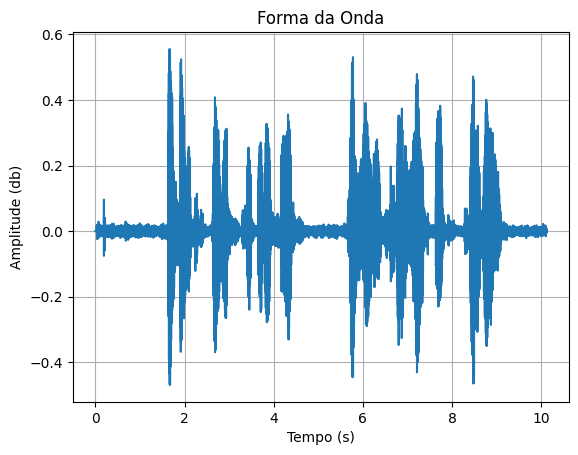

In [ ]:
#Lendo aúdio WAV
audio, sample_rate = sf.read('/content/Filtragem_de_sinais_de_voz/Gravação-Pds.wav')
'''
audio => sinal armazenado em uma numpy
sample_rate => a taxa de amostragem do sinal
'''
print(len(audio))
#tempo
time = torch.arange(0, len(audio)) / sample_rate # Calculo do tempo do audio

print(f'Frequência de Amostragem: {sample_rate} Hz')
plt.title('Forma da Onda')
plt.plot(time, audio)
plt.xlabel("Tempo (s)");
plt.ylabel("Amplitude (db)");
plt.grid()
plt.show()

Audio("/content/Filtragem_de_sinais_de_voz/Gravação-Pds.wav")

##Transformada de Fourier do sinal de entrada

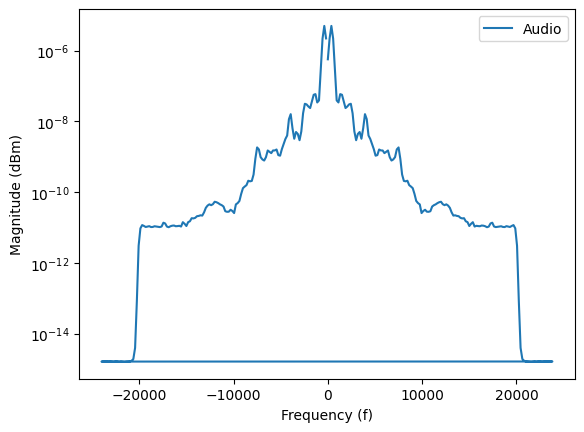

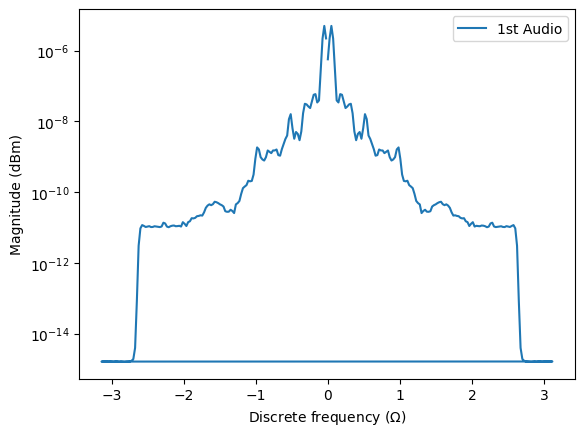

In [ ]:
# Gráfico que mostra a frequência
x, y = sp.welch(audio, sample_rate, return_onesided=False) #A estimativa da densidade espectral de potência é uma técnica comumente usada em análise espectral

plt.figure()
plt.semilogy(x, y, label="Audio")
plt.legend()
plt.xlabel("Frequency (f)")
plt.ylabel("Magnitude (dBm)")
plt.show()

x_digi, y_digi = sp.welch(audio, sample_rate, return_onesided=False)


plt.figure()
plt.semilogy(2*np.pi*x_digi/sample_rate, y_digi, label="1st Audio") # We are converting frequency in Hz to discrete frequency in rad
plt.legend()
plt.xlabel(r"Discrete frequency ($\Omega$)")
plt.ylabel("Magnitude (dBm)")
plt.show()

# Realizando o Processo de DownSampling

## Realizando Downsampling utilizando o filtro IIR

In [ ]:
# As especificações do filtro devem ser modificadas de acordo
gp = 1     # delta p nos slides... passband gain (dB)
gs = 30    # - delta s nos slides... stopband gain (actually, minimum attenuation, in dB)

fss = 48000       # sampling frequency (Hz)
fp2 = 0.8*24000/6    # passband frequency 02  (Hz)
fs2 = 24000/6     # stopband frequency 02  (Hz)
# -------------------------------------------------

fn = fss/2    # Nyquist frequency

#wp = fp2#fp2/fn   # normalised passband frequency 02
#ws = fs2#/fn   # normalised stopband frequency 02

# Projeto de filtro IIR
#    The type of IIR filter to design:
#            Butterworth : ‘butter’
#            Chebyshev I : ‘cheby1’
#            Chebyshev II : ‘cheby2’
#            Cauer/elliptic: ‘ellip’
#            Bessel/Thomson: ‘bessel’
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html
filtype = 'butter'  # qual aproximation
b, a = sp.iirdesign(fs=fss,wp=fp2,ws=fs2,gpass=gp,gstop=gs,analog=False,
                    ftype=filtype,output='ba') # função de projeto do filtro IIR

# Cálculo da resposta em frequência
w, h = sp.freqz(b, a, 2**12, fs = fss)
h_mag = 20 * np.log10( abs(h)) # frequency response magnitude (dB)
h_ang = np.unwrap(np.angle(h)) # frequency response phase

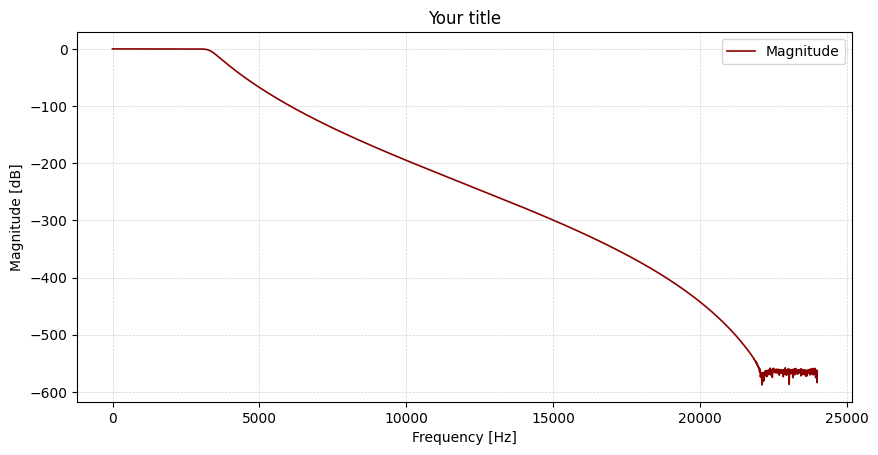

In [ ]:
# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Your title')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
#plt.axis([0,750, -50,2])
## Gera legenda
plt.legend()
plt.show()

In [ ]:
print('Ordem do filtro: ', len(a)-1)

Ordem do filtro:  18


In [ ]:
file_path = '/content/Filtragem_de_sinais_de_voz/Gravação-Pds.wav'  # Substitua pelo caminho correto do arquivo WAV
fs, audio_data = wav.read(file_path)
fs_new = 8000
filtered_signal = lfilter(b, a, audio_data)
downsampled_signal_sn = filtered_signal[::int(6)] # Aúdio sem normalização
sf.write('audio_sem_Normalizacao_8Khz.wav',downsampled_signal_sn , 8000)

audio_data = audio_data.astype(np.float32) / 32767.0  # Normalizar para o intervalo [-1, 1]
filtered_signal = lfilter(b, a, audio_data)
adjusted_downsampled_signal = filtered_signal[::int(6)]

sf.write('audio_8Khz.wav',adjusted_downsampled_signal , 8000)

In [ ]:
#Audio não normalizado
Audio('/content/audio_sem_Normalizacao_8Khz.wav')

In [ ]:
#Audio normalizado
Audio("/content/audio_8Khz.wav")

## Realizando Downsampling utilizando bibliotecas definidas em Python


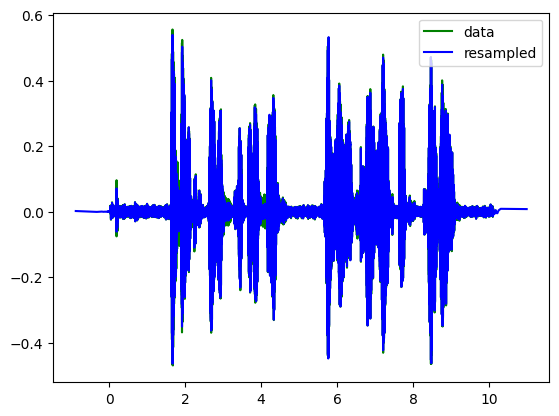

In [ ]:
import numpy as np
from scipy import signal

#Downsampling
AudioDown = signal.resample(audio, 80895, None,0)
timeDown = np.sort(signal.resample(time, 80895))

#Plotando novo sinal
import matplotlib.pyplot as plt
plt.plot(time, audio, 'g-',timeDown, AudioDown,'b')
plt.legend(['data', 'resampled'], loc='best')
plt.show()
print()

In [ ]:
sf.write('DownsampleAudio.wav',AudioDown , 8000)

In [ ]:
audioDown, sample_rateDown = sf.read('DownsampleAudio.wav')
Audio("DownsampleAudio.wav")

### Transformada de Fourier do sinal Downsampling

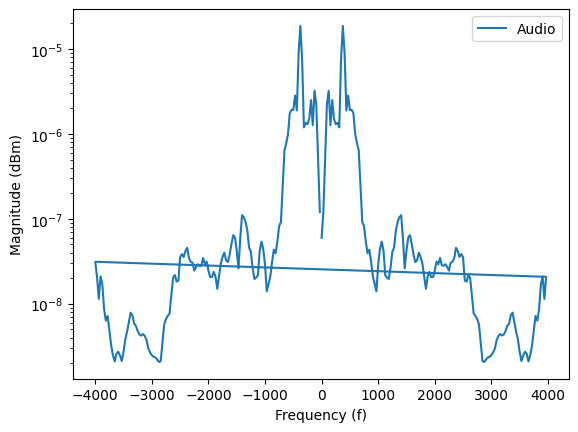

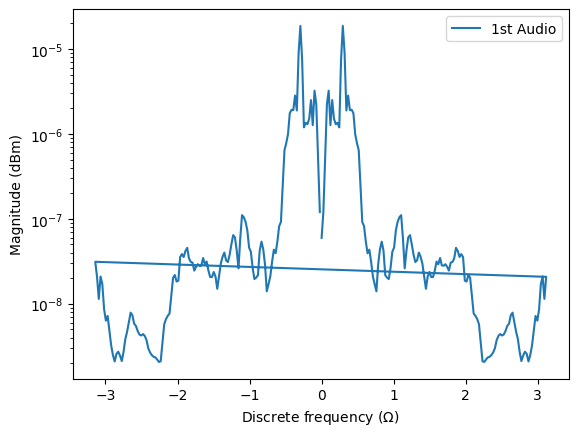

In [ ]:
# Gráfico que mostra a frequência
xnewDown, ynewDown = sp.welch(audioDown, sample_rateDown, return_onesided=False)

plt.figure()
plt.semilogy(xnewDown, ynewDown, label="Audio")
plt.legend()
plt.xlabel("Frequency (f)")
plt.ylabel("Magnitude (dBm)")
plt.show()

x_digiDown, y_digiDown = sp.welch(audioDown, sample_rateDown, return_onesided=False)


plt.figure()
plt.semilogy(2*np.pi*x_digiDown/sample_rateDown, y_digiDown, label="1st Audio") #Estamos convertendo de Hz para Radiano
plt.legend()
plt.xlabel("Discrete frequency ($\Omega$)")
plt.ylabel("Magnitude (dBm)")
plt.show()

### Reposta em frequência do filtro

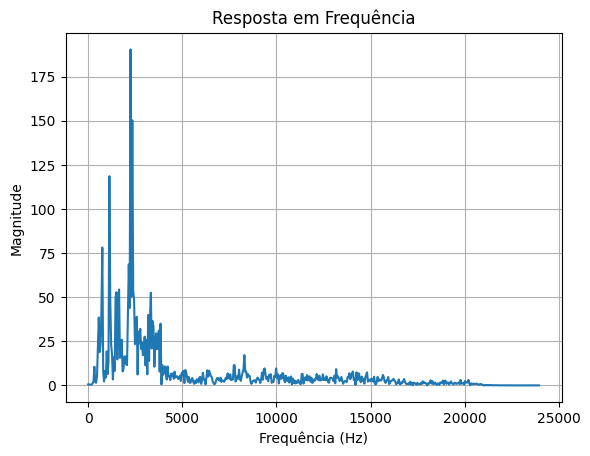

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

# Carregar o sinal de entrada e o sinal de saída
entrada, fs = sf.read('/content/Filtragem_de_sinais_de_voz/Gravação-Pds.wav')  # Carregar o arquivo de entrada WAV
saida, _ = sf.read('/content/DownsampleAudio.wav')  # Carregar o arquivo de saída WAV

# Downsampling
fator_downsampling = 6
entrada_downsampled = signal.decimate(entrada, fator_downsampling)

# Resposta em frequência
frequencias, resposta = signal.freqz(entrada_downsampled)
frequencias_hz = frequencias * (fs / (2 * np.pi))  # Converter frequências para Hz

# Plotar a resposta em frequência
plt.figure()
plt.plot(frequencias_hz, np.abs(resposta))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Resposta em Frequência')
plt.grid(True)
plt.show()


#Realizando Upsampling utilizando bibliotecas definidas em Python

In [ ]:
#Upsampling
AudioUp = signal.resample(AudioDown, 527680, None,0)
timeUp = np.sort(signal.resample(timeDown, 527680))

#Plotando novo sinal
import matplotlib.pyplot as plt
plt.plot(timeDown, AudioDown, 'g-',timeUp, AudioUp,'b')
plt.legend(['data', 'resampled'], loc='best')
plt.show()

In [ ]:
sf.write('UpsampleAudio.wav',AudioUp , 48000)

In [ ]:
Audio("UpsampleAudio.wav")

### Transformada de Fourier do sinal Upsampling

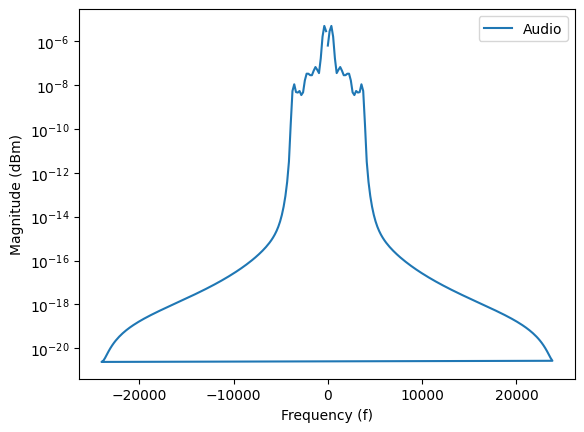

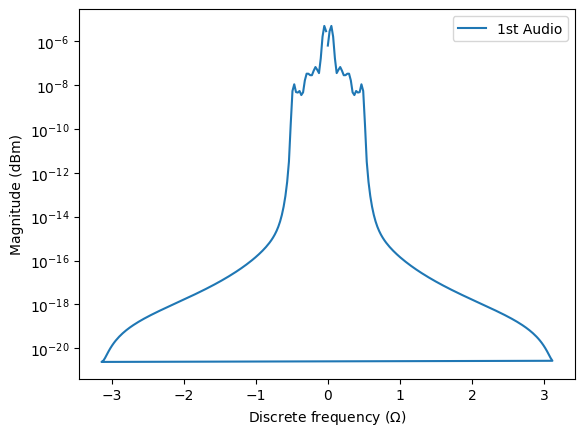

In [ ]:
# Gráfico que mostra a frequência
xnewUp, ynewUp = sp.welch(AudioUp, 48000, return_onesided=False)

plt.figure()
plt.semilogy(xnewUp, ynewUp, label="Audio")
plt.legend()
plt.xlabel("Frequency (f)")
plt.ylabel("Magnitude (dBm)")
plt.show()

plt.figure()
plt.semilogy(2*np.pi*xnewUp/48000, ynewUp, label="1st Audio") # Estamos convertendo de Hz para Radiano
plt.legend()
plt.xlabel(r"Discrete frequency ($\Omega$)")
plt.ylabel("Magnitude (dBm)")
plt.show()

# Realizand o Processo de UpSampling

In [ ]:
#Plotando o sinal que foi realizado o Downsampling
#Rodando Aúdio WAV

audio, sample_rate = sf.read('/content/audio_8Khz.wav')
'''
signal => sinal armazenado em uma numpy
sample_rate => a taxa de amostragem do sinal
'''

time = torch.arange(0, len(audio)) / sample_rate

print(f'Frequência de Amostragem: {sample_rate} Hz')
plt.title('Forma da Onda')
plt.plot(time, audio)
plt.xlabel("Tempo (s)");
plt.ylabel("Amplitude (db)");
plt.grid()
plt.show()

plt.title('Forma da Onda')
plt.plot(time, audio)
plt.xlabel("Tempo (s)");
plt.ylabel("Amplitude (db)");
plt.axis([0,0.25,-0.01,0.01])
plt.grid()
plt.show()

Audio("/content/audio_8Khz.wav")

Frequência de Amostragem: 48000 Hz


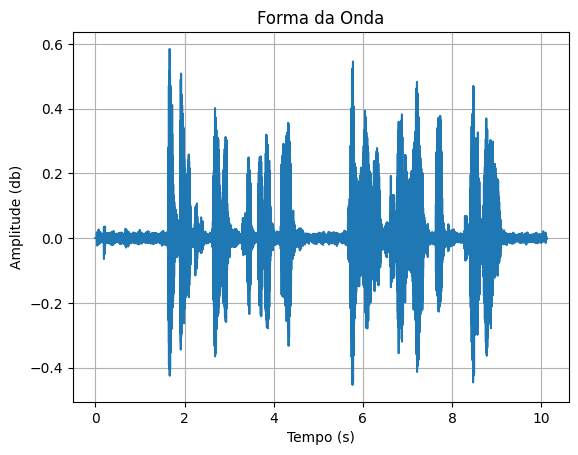

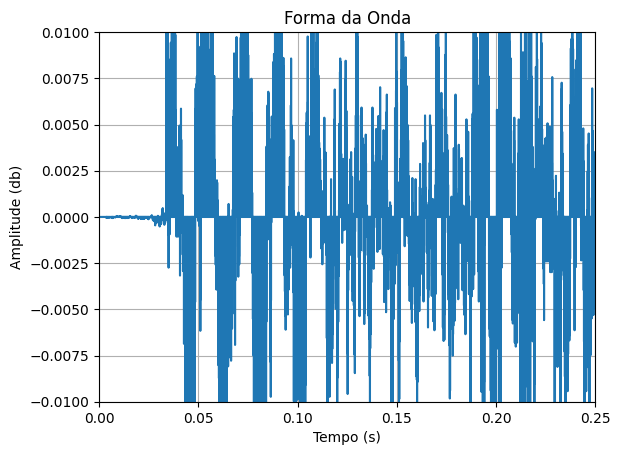

In [ ]:
import numpy as np
from scipy.signal import resample

def upsample_prefilter(vector, factor):
	new_vector = np.zeros(len(vector)*factor)
	new_vector[::factor] = vector

	return new_vector

input_sample_rate = 8000  # Taxa de amostragem de entrada (8 kHz)
output_sample_rate = 48000  # Taxa de amostragem de saída (48 kHz)

upsampling_factor = output_sample_rate // input_sample_rate

output_signal = upsample_prefilter(audio, upsampling_factor)
time = torch.arange(0, len(output_signal)) / 48000
print(f'Frequência de Amostragem: 48000 Hz')
plt.title('Forma da Onda')
plt.plot(time, output_signal)
plt.xlabel("Tempo (s)");
plt.ylabel("Amplitude (db)");
plt.grid()
plt.show()

plt.title('Forma da Onda')
plt.plot(time, output_signal)
plt.xlabel("Tempo (s)");
plt.ylabel("Amplitude (db)");
plt.axis([0,0.25,-0.01,0.01])
plt.grid()
plt.show()

In [ ]:

x, y = signal.welch(output_signal, output_sample_rate, return_onesided=False)

plt.figure()
plt.semilogy(x, y, label="48KHz")
plt.legend()
plt.xlabel("Frequency (f)")
plt.ylabel("Magnitude (dBm)")
plt.show()

plt.figure()
plt.semilogy(2*np.pi*x/output_sample_rate, y, label="48Khz") # Convertendo a frequencia de Hz para radiano
plt.legend()
plt.xlabel(r"Discrete frequency ($\Omega$)")
plt.ylabel("Magnitude (dBm)")
plt.show()

In [ ]:
# As especificações do filtro devem ser modificadas de acordo
gp = 1     # delta p nos slides... passband gain (dB)
gs = 30    # - delta s nos slides... stopband gain (actually, minimum attenuation, in dB)

fss = 48000       # sampling frequency (Hz)
fp2 = 0.8*24000/6    # passband frequency 02  (Hz)
fs2 = 24000/6     # stopband frequency 02  (Hz)
# -------------------------------------------------

fn = fss/2    # Nyquist frequency

#wp = fp2#fp2/fn   # normalised passband frequency 02
#ws = fs2#/fn   # normalised stopband frequency 02

# Projeto de filtro IIR
#    The type of IIR filter to design:
#            Butterworth : ‘butter’
#            Chebyshev I : ‘cheby1’
#            Chebyshev II : ‘cheby2’
#            Cauer/elliptic: ‘ellip’
#            Bessel/Thomson: ‘bessel’
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html
filtype = 'butter'  # qual aproximation
b, a = sp.iirdesign(fs=fss,wp=fp2,ws=fs2,gpass=gp,gstop=gs,analog=False,
                    ftype=filtype,output='ba') # função de projeto do filtro IIR

# Cálculo da resposta em frequência
w, h = sp.freqz(b, a, 2**12, fs = fss)
h_mag = 20 * np.log10( abs(h)) # frequency response magnitude (dB)
h_ang = np.unwrap(np.angle(h)) # frequency response phase

In [ ]:
# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Filtro')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
#plt.axis([0,1750, -5,2])
## Gera legenda
plt.legend()
plt.show()

In [ ]:
print('Ordem do filtro: ', len(a)-1)

In [ ]:
filtered_signal = 6*lfilter(b, a, output_signal)

In [ ]:
sf.write('final_audio.wav', filtered_signal , 48000)

In [ ]:
Audio('/content/final_audio.wav')

In [ ]:
entrada, fs = sf.read('/content/final_audio.wav')  # Carregar o arquivo de entrada WAV
time = torch.arange(0, len(entrada)) / fs
print('Frequencia de amostrage: ', fs,'hz')
plt.figure()
plt.plot(time, entrada, label="48KHz")
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Magnitude ")
plt.show()

In [ ]:
x, y = signal.welch(entrada, fs, return_onesided=False)

plt.figure()
plt.semilogy(x, y, label="48KHz")
plt.legend()
plt.xlabel("Frequency (f)")
plt.ylabel("Magnitude (dBm)")
plt.show()

#Calculo do MSE



In [ ]:
audio, sample_rate = sf.read('/content/Filtragem_de_sinais_de_voz/Gravação-Pds.wav')

mse = np.mean((audio - filtered_signal)**2)
print("MSE:", mse)

MSE: 0.012608717564020766


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(audio, filtered_signal)
print("MSE:", mse)

MSE: 0.012608717564020766


Referências:

https://scipy.org/

https://embarcados.com.br/oversampling-upsampling-downsampling-dsp/

